Overview

This project involves a comprehensive market analysis using data science techniques in retail and e-commerce to discover associations between products that customers tend to buy together. The goal is to understand the relationships between items in a transaction, helping businesses make informed decisions about product placement, promotions, and inventory management. 

Part B – Python coding and report

REPORT


- import foundational Libraries

- Data Preprocessing:
Load the grocery sales data and perform initial data cleaning.
Convert 'Member_number' to a string and 'Date' to datetime format.

- Unique Transactions:
Create a 'uniqueTransaction' column to group items purchased per customer per day.

- Cross-Tabulation (Basket Creation):
Create a cross-tabulation ('basket') to represent the frequency of items in each unique transaction.
Create a binary-encoded DataFrame ('apriori_df').

- Apriori Algorithm and Association Rules:
Apply the Apriori algorithm to generate frequent itemsets.
Use association rules, focusing on Zhang's metric for evaluation.

- Heatmap Visualization:

Visualize product associations using a heatmap.
Interpret the heatmap to understand frequent itemsets.

- Positive Association Visualization:
Explore pairs with positive Zhang's metric to highlight positive associations.
Utilize heatmaps for clear and intuitive visualization of product associations.
Explore positive associations to understand which products complement each other.

- Insights and recommendations
Use Zhang's metric for a comprehensive evaluation of association rules.
Interpret negative and positive values to understand anti-associations and strong positive relationships.
'Soda,' 'Whole Milk,' and 'Bottled Water' in close proximity in the store, as they form a strong association cluster.



Dataset Description

Number of Instances:38765

Attribute Information: 3

1.	Member_number: A unique identifier used for customers
2.	Date: Date of purchase
3.	itemDescription: name of itempurchased


Python Code

In [2]:
# Foundational libraries:
import numpy as np  # Numerical computing
import pandas as pd # Data manipulation and analysis
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Importing the CSV file to Dataframe Format

In [3]:
Grocery = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

Data Overview

**Data Preparation and Pre-processing**

In [4]:
# check first 10 rows
Grocery.head(n=10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [5]:
# check last 10 rows
Grocery.tail(n=10)

,Member_number,Date,itemDescription
38755,4586,26-09-2014,bottled water
38756,1987,29-10-2014,fruit/vegetable juice
38757,4376,07-12-2014,rolls/buns
38758,2511,18-06-2014,long life bakery product
38759,3364,06-05-2014,oil
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [6]:
# view column names
Grocery.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [7]:
Grocery.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [8]:
# Check the size of the data
Grocery.shape

(38765, 3)

In [9]:
# quick summary for the columns
Grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [10]:
# Check for missing values in the data
Grocery.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
# Converting Member_number to a string
# Converting Date to a datetime format

Grocery['Member_number'] = Grocery['Member_number'].astype(str)
Grocery['Date'] = pd.to_datetime(Grocery['Date'], format='%d-%m-%Y')
Grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [12]:
# sorting of group items purchased per customer per day into a single basket
# Let's all that basket 'uniqueTransaction'
Grocery['uniqueTransaction'] = Grocery['Member_number']+ '_' + Grocery['Date'].astype(str)
Grocery.head()

,Member_number,Date,itemDescription,uniqueTransaction
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


In [13]:
# take a peek into a particular customer (1808)'s purchases.
# to see purchases he made on 4 different days.
# All his purchases per day have the same uniqueTransaction

oneCustomerCheck = Grocery[Grocery['Member_number'] == '1808'].sort_values('Date')
oneCustomerCheck.head(20)

,Member_number,Date,itemDescription,uniqueTransaction
9090,1808,2014-11-29,meat,1808_2014-11-29
25239,1808,2014-11-29,whole milk,1808_2014-11-29
11488,1808,2014-12-15,sugar,1808_2014-12-15
27637,1808,2014-12-15,citrus fruit,1808_2014-12-15
38731,1808,2014-12-15,napkins,1808_2014-12-15
4355,1808,2015-02-04,long life bakery product,1808_2015-02-04
20504,1808,2015-02-04,semi-finished bread,1808_2015-02-04
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
16149,1808,2015-07-21,rolls/buns,1808_2015-07-21
36088,1808,2015-07-21,candy,1808_2015-07-21


EXPLORATORY DATA ANALYSIS

In [17]:
# Creating a cross-tabulation (cross-tab) of the 'uniqueTransaction' and 'itemDescription' columns from the DataFrame 'data'
# Cross-tabulation is a way to represent the frequency or relationship between two categorical variables
# In this case, it's creating a table that shows how many times each item appears in each unique transaction
basket = pd.crosstab(Grocery['uniqueTransaction'], Grocery['itemDescription'])
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# function converts each element to 1 if its value is greater than 0, otherwise to 0
# This is often done in the context of association rule mining, where binary values (1 or 0) represent the presence or absence of an item in a transaction
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)

In [19]:
apriori_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-03-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Applying the Apriori algorithm to generate frequent itemsets from the binary-encoded DataFrame 'apriori_df'
# The 'min_support' parameter is set to 0.005, indicating the minimum support threshold for an itemset to be considered frequent
# 'use_colnames=True' ensures that item names are used instead of column indices in the resulting DataFrame
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False).head(10)

C:\Users\jonat\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
8,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
34,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
35,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
30,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
31,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
33,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
32,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


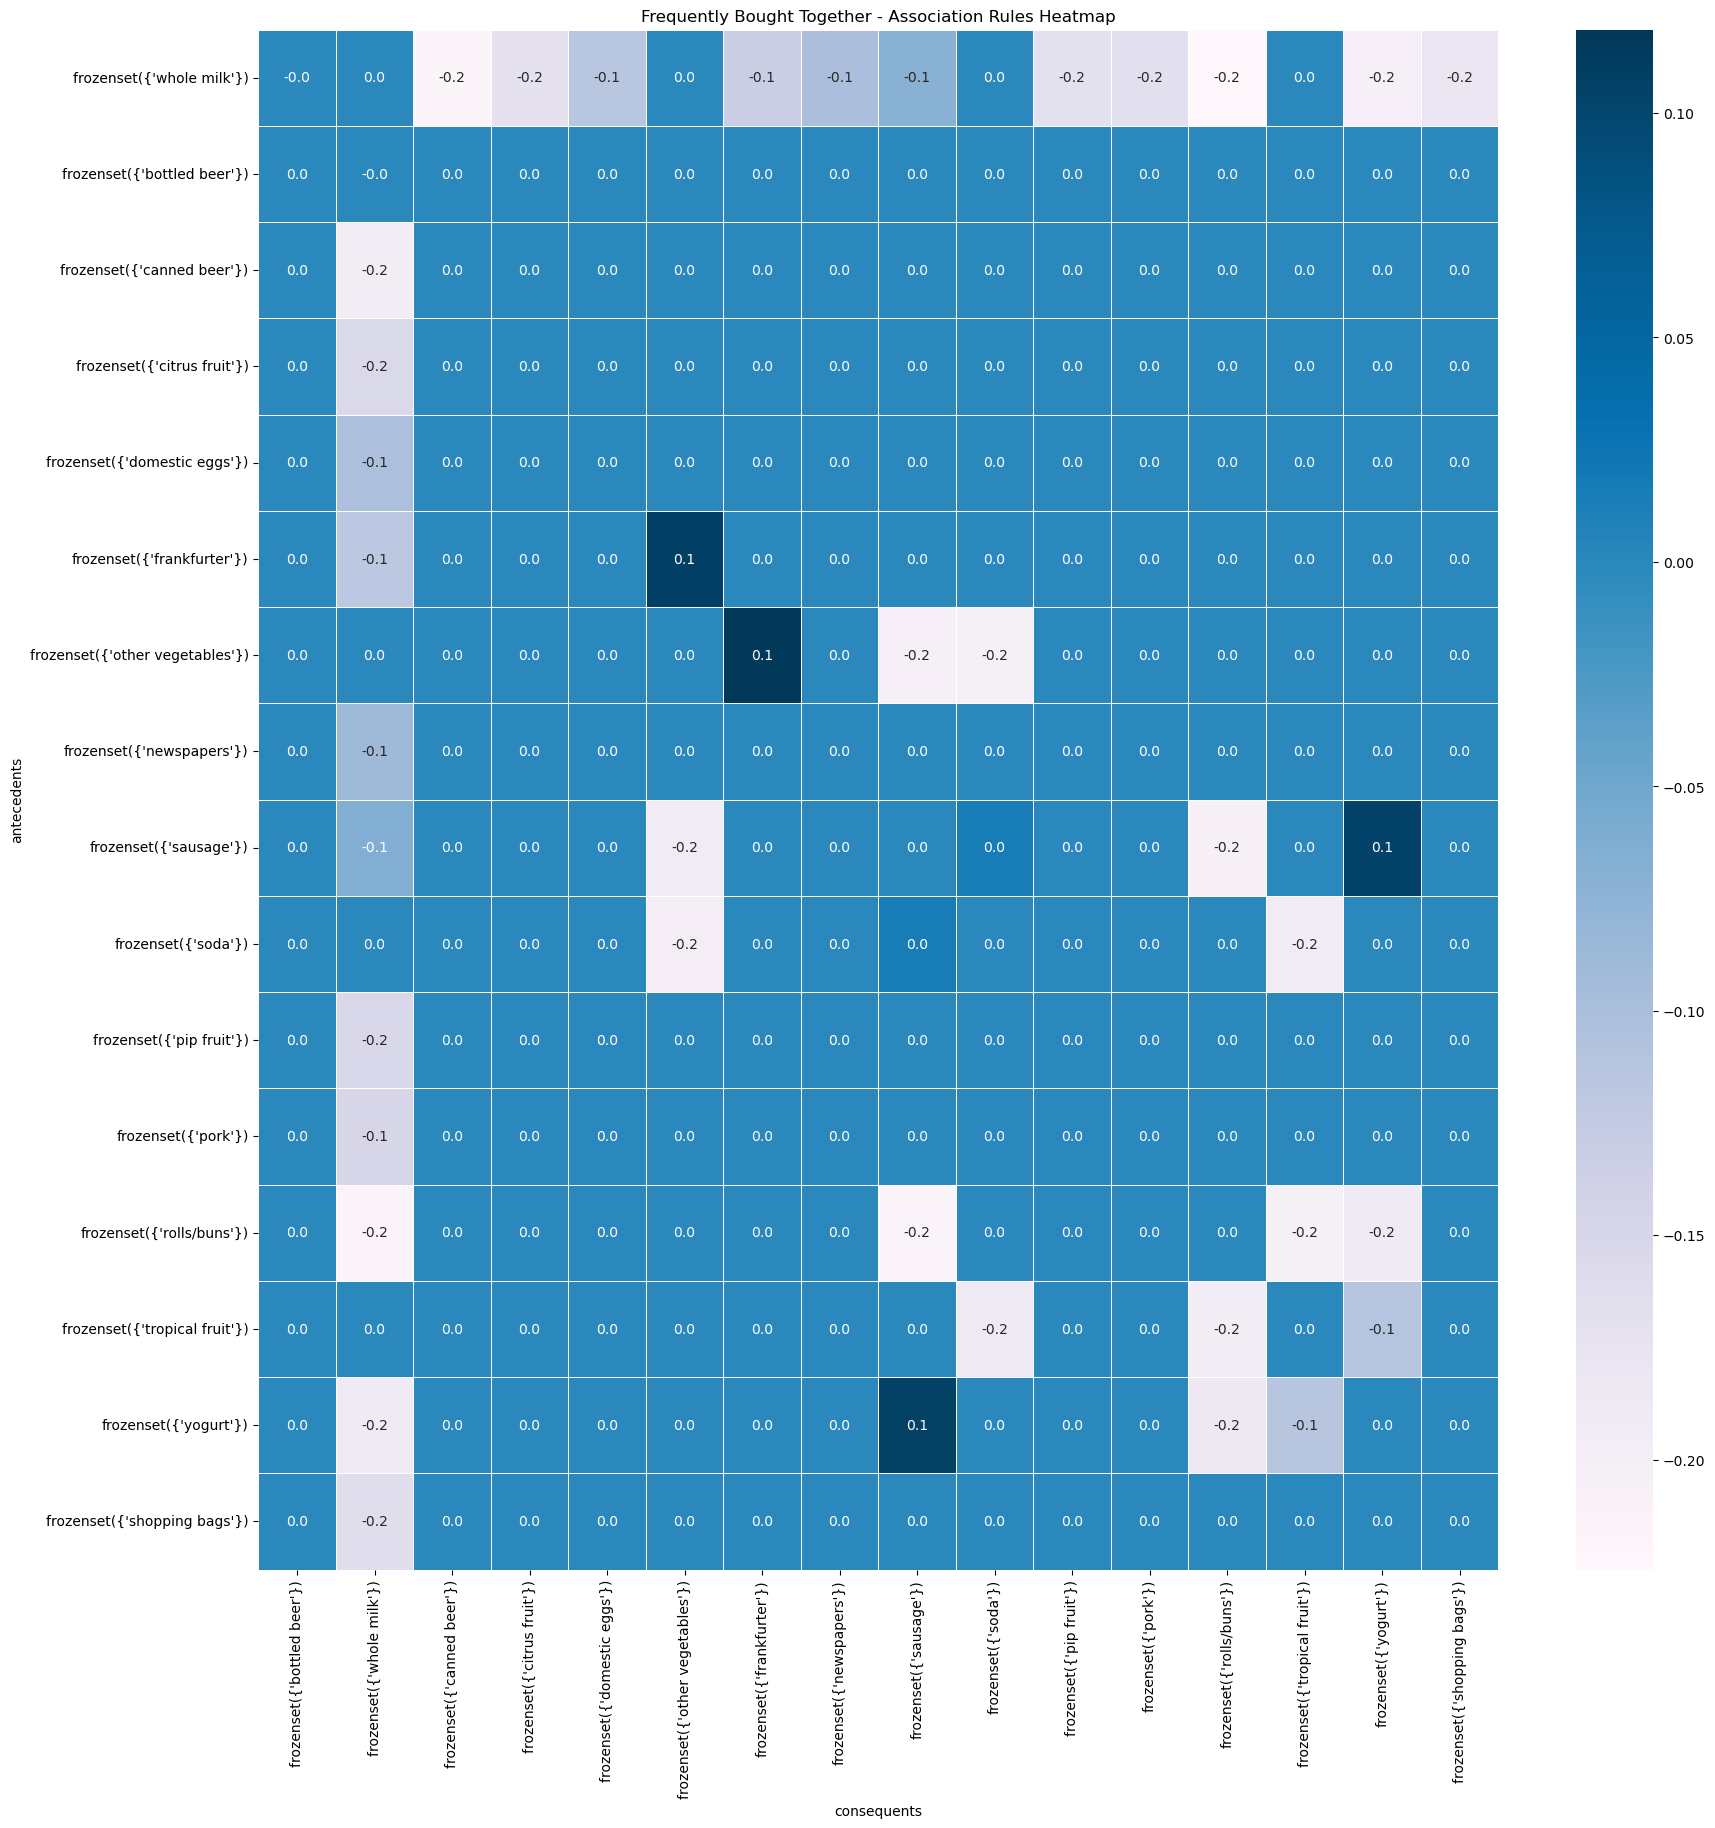

In [21]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

# I used Zhang's metric in my viz because it combines support, confidence, and lift into a single measure.
# A negative value suggests that the occurrence of the antecedent reduces the likelihood of the consequent.
# It implies that despite a certain level of confidence, the occurrence of the antecedent reduces the overall support or likelihood of the consequent, leading to a negative impact or anti-association.
# In practical terms, a negative Zhang's metric might suggest scenarios where the presence of one item in a transaction makes the occurrence of another item less likely than expected.
# A positive Zhang's metric would the opposite

In [22]:
# Taking pairs with positive Zhang's metric in a separate dataframe

pos_pair = rules[rules['zhangs_metric'] > 0]

pos_pair.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
9,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
30,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
31,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
34,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508


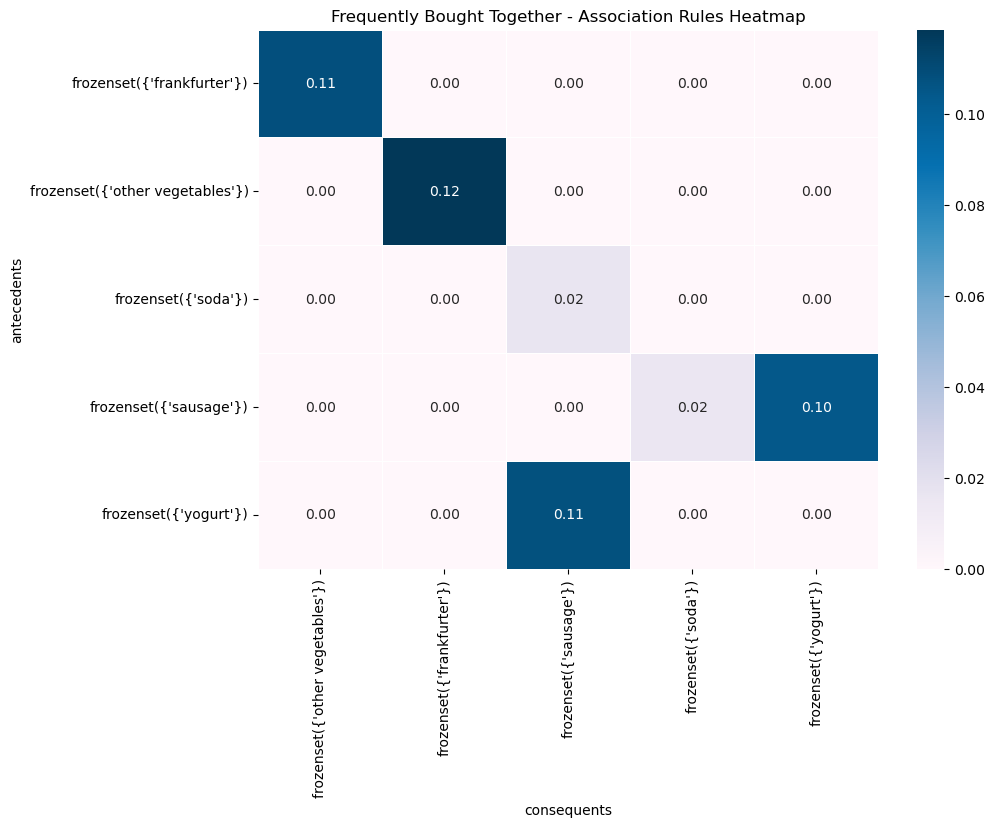

In [23]:
# Creating a matrix of product associations
pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".2f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

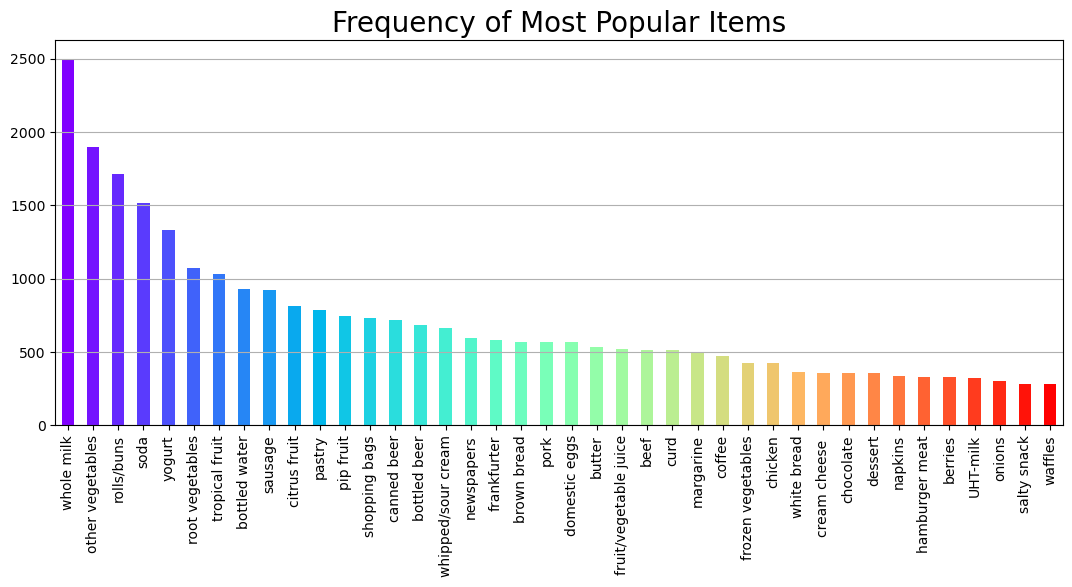

In [25]:
import matplotlib.pyplot as plt
import numpy as np

color = plt.cm.rainbow(np.linspace(0, 1, 40))
top_items = Grocery['itemDescription'].value_counts().head(40)

top_items.plot.bar(color=color, figsize=(13, 5))
plt.title('Frequency of Most Popular Items', fontsize=20)
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()


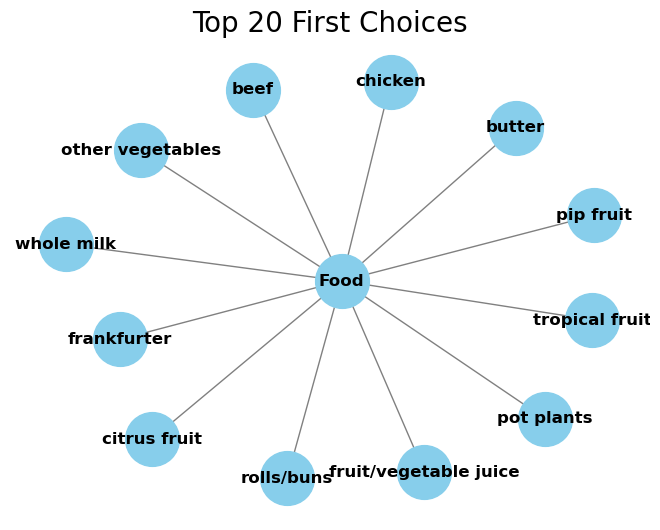

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

Grocery['food'] = 'Food'
food = Grocery.truncate(before=-1, after=15)
food_graph = nx.from_pandas_edgelist(food, source='food', target='itemDescription', edge_attr=True)

# Draw the graph
pos = nx.spring_layout(food_graph)
nx.draw(food_graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, edge_color='gray')
plt.axis('off')
plt.grid()
plt.title('Top 20 First Choices', fontsize = 20)
plt.show()

